Debido al hecho de que GitHub realiza una representación estática de los cuadernos y no incluye el HTML/JavaScript incrustado que forma un gráfico de trama, y teniendo en cuenta que para presentar la información de una forma más amena e interactiva se hizo uso de la librería Plotly de Python la cual crea este tipo de gráficas combinadas con HTML, no es posible verlas directamente en este Notebook, por lo que le invitamos a observar este mismo Notebook de forma renderizada en el link de [acá](https://colab.research.google.com/drive/1rGd8SbDYtkVTEmiLIJs8UJtmemvyqUlT?usp=sharing) el cual es un Gooogle Colab con el código que le permitirá interactuar con el mismo

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.io as pio
pio.renderers.default = "plotly_mimetype"

In [2]:
df = pd.read_csv('Base_de_datos_relacionada_con_area_plantada_con_Plantaciones_Forestales_Comerciales.csv')

In [3]:
df

,Departamento,Sistema Siembra,Nombre Cientifico,Agrupacion por Especies Reforestacion Comercial,Agrupacion por Origen,Nombre Comun,Año de Establecimiento,Modo Siembra,SubRegión,Zona UPRA,Hectareas (Ha),Fuente de Información
0,BOYACÁ,Plantación Forestal,Cupressus lusitanica,Cipres,Especie Introducida,Cipres,1989,Arboles,ANDINA,OTROS,4.5,MADR
1,BOYACÁ,Plantación Forestal,Pinus pátula,Pino pátula,Especie Introducida,Pino mexicano,1989,Arboles,ANDINA,OTROS,2.7,MADR
2,BOYACÁ,Plantación Forestal,Pinus pátula,Pino pátula,Especie Introducida,Pino mexicano,1979,Hectáreas,ANDINA,OTROS,4.0,MADR
3,VALLE DEL CAUCA,Plantación Forestal,Eucalyptus grandis,Eucalipto Grandis,Especie Introducida,Eucalipto comùn,1993,Hectáreas,PACÍFICO,EJE CAFETERO Y SUR OCCIDENTE,0.3,MADR
4,CAUCA,Plantación Forestal,Eucalyptus grandis,Eucalipto Grandis,Especie Introducida,Eucalipto comùn,1996,Hectáreas,PACÍFICO,EJE CAFETERO Y SUR OCCIDENTE,30.0,MADR
...,...,...,...,...,...,...,...,...,...,...,...,...
31098,SUCRE,Sistemas Agroforestal,Cordia alliodora,Nogal,Especie Nativa,Nogal cafetero,2021,Hectáreas,CARIBE,OTROS,0.0,MADR
31099,TOLIMA,Sistemas Agroforestal,Cordia alliodora,Nogal,Especie Nativa,Nogal cafetero,2021,Hectáreas,ANDINA,OTROS,3.0,MADR
31100,VALLE DEL CAUCA,Sistemas Agroforestal,Cordia alliodora,Nogal,Especie Nativa,Nogal cafetero,2021,Hectáreas,PACÍFICO,EJE CAFETERO Y SUR OCCIDENTE,2.3,MADR
31101,VAUPÉS,Sistemas Agroforestal,Cordia alliodora,Nogal,Especie Nativa,Nogal cafetero,2021,Hectáreas,AMAZONÍA,OTROS,0.0,MADR


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31103 entries, 0 to 31102
Data columns (total 12 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Departamento                                     31103 non-null  object 
 1   Sistema Siembra                                  31103 non-null  object 
 2   Nombre Cientifico                                31103 non-null  object 
 3   Agrupacion por Especies Reforestacion Comercial  31103 non-null  object 
 4   Agrupacion por Origen                            31103 non-null  object 
 5   Nombre Comun                                     12548 non-null  object 
 6   Año de Establecimiento                           31103 non-null  int64  
 7   Modo Siembra                                     31103 non-null  object 
 8   SubRegión                                        31103 non-null  object 
 9   Zona UPRA                   

In [5]:
df.describe()

,Año de Establecimiento,Hectareas (Ha)
count,31103.000000,31103.000000
mean,2005.667106,17.323818
std,12.490286,57.833340
min,1960.000000,-2.600000
25%,1999.000000,0.500000
50%,2008.000000,2.100000
75%,2015.000000,11.900000
max,2022.000000,2468.000000


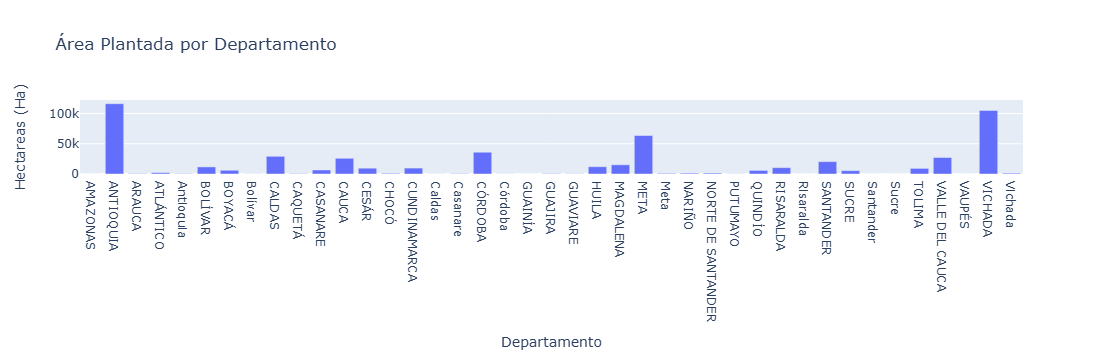

In [6]:
# Distribución de área plantada por departamento
fig = px.bar(
    df.groupby("Departamento")['Hectareas (Ha)'].sum().reset_index(),
    x='Departamento',
    y='Hectareas (Ha)',
    title="Área Plantada por Departamento"
)
fig.show()


In [7]:
# Agrupar por departamento y calcular el total de hectáreas
hectareas_por_departamento = df.groupby('Departamento')['Hectareas (Ha)'].sum().reset_index()

# Obtener los 5 departamentos con mayor cantidad de hectáreas
top_5_departamentos = hectareas_por_departamento.nlargest(5, 'Hectareas (Ha)')

# Filtrar los datos para solo los 5 departamentos seleccionados
df_top_5_departamentos = df[df['Departamento'].isin(top_5_departamentos['Departamento'])]

# Agrupar por departamento, especies y origen y calcular la suma de hectáreas
hectareas_por_especies_origen = df_top_5_departamentos.groupby(['Departamento', 'Agrupacion por Especies Reforestacion Comercial', 'Agrupacion por Origen'])['Hectareas (Ha)'].sum().reset_index()

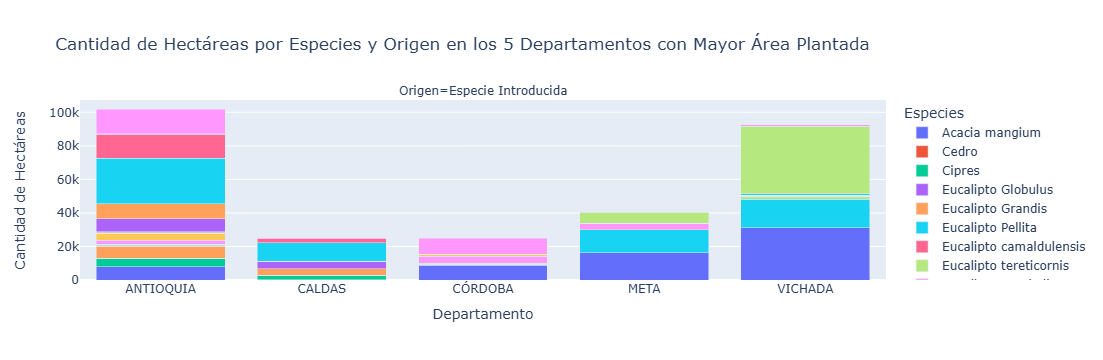

In [8]:
hectareas_por_especies_introducida = hectareas_por_especies_origen[hectareas_por_especies_origen['Agrupacion por Origen'] == 'Especie Introducida']
#Crear el gráfico de barras apiladas
fig = px.bar(hectareas_por_especies_introducida,
             x='Departamento',
             y='Hectareas (Ha)',
             color='Agrupacion por Especies Reforestacion Comercial',
             facet_col='Agrupacion por Origen',
             title='Cantidad de Hectáreas por Especies y Origen en los 5 Departamentos con Mayor Área Plantada',
             labels={'Hectareas (Ha)': 'Cantidad de Hectáreas', 'Agrupacion por Especies Reforestacion Comercial': 'Especies', 'Agrupacion por Origen': 'Origen'},
             barmode='stack')

# Mostrar el gráfico
fig.show()


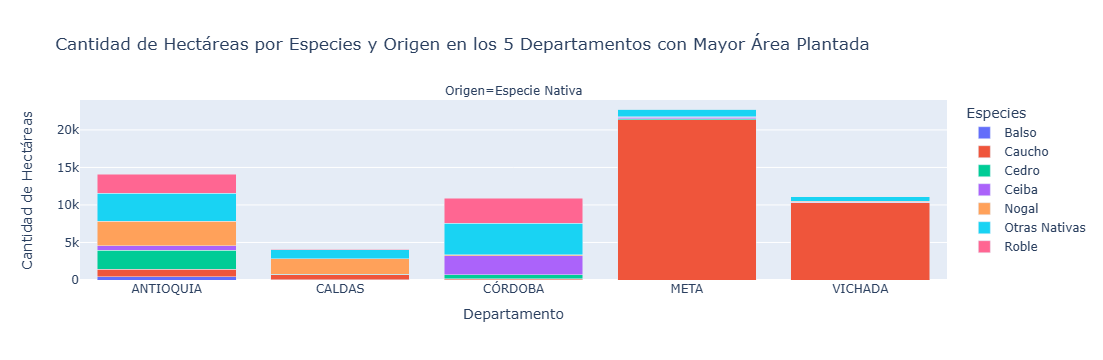

In [9]:
hectareas_por_especies_nativa = hectareas_por_especies_origen[hectareas_por_especies_origen['Agrupacion por Origen'] == 'Especie Nativa']
#Crear el gráfico de barras apiladas
fig = px.bar(hectareas_por_especies_nativa,
             x='Departamento',
             y='Hectareas (Ha)',
             color='Agrupacion por Especies Reforestacion Comercial',
             facet_col='Agrupacion por Origen',
             title='Cantidad de Hectáreas por Especies y Origen en los 5 Departamentos con Mayor Área Plantada',
             labels={'Hectareas (Ha)': 'Cantidad de Hectáreas', 'Agrupacion por Especies Reforestacion Comercial': 'Especies', 'Agrupacion por Origen': 'Origen'},
             barmode='stack')

# Mostrar el gráfico
fig.show()


In [10]:
hectareas_por_especies_introducida

,Departamento,Agrupacion por Especies Reforestacion Comercial,Agrupacion por Origen,Hectareas (Ha)
0,ANTIOQUIA,Acacia mangium,Especie Introducida,7833.7
3,ANTIOQUIA,Cedro,Especie Introducida,140.8
6,ANTIOQUIA,Cipres,Especie Introducida,5069.1
7,ANTIOQUIA,Eucalipto Globulus,Especie Introducida,3.2
8,ANTIOQUIA,Eucalipto Grandis,Especie Introducida,6963.1
...,...,...,...,...
96,VICHADA,Pino oocarpa,Especie Introducida,70.4
97,VICHADA,Pino pátula,Especie Introducida,1000.0
98,VICHADA,Pino tecunumanii,Especie Introducida,60.1
99,VICHADA,Pinus caribaea,Especie Introducida,40035.0


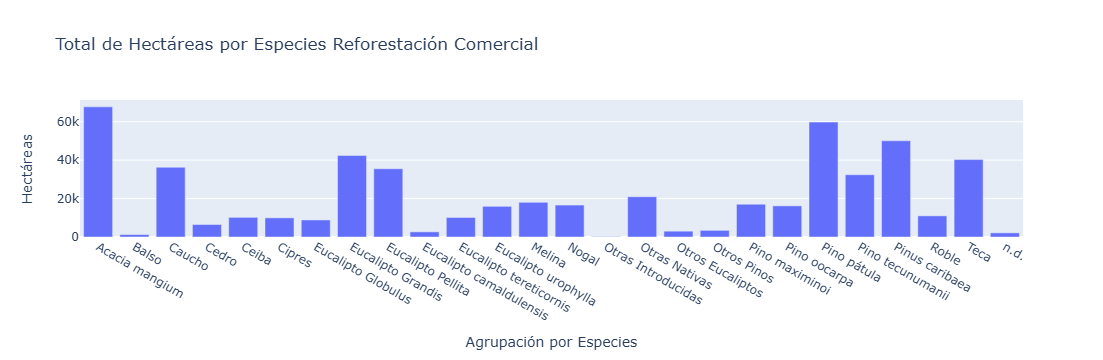

In [11]:
# Total de Hectáreas por Especies Reforestacion Comercial"
hectareas_especies = df.groupby('Agrupacion por Especies Reforestacion Comercial')['Hectareas (Ha)'].sum().reset_index()
fig = px.bar(hectareas_especies, x='Agrupacion por Especies Reforestacion Comercial', y='Hectareas (Ha)', title='Total de Hectáreas por Especies Reforestación Comercial')
fig.update_layout(xaxis_title='Agrupación por Especies', yaxis_title='Hectáreas')
fig.show()


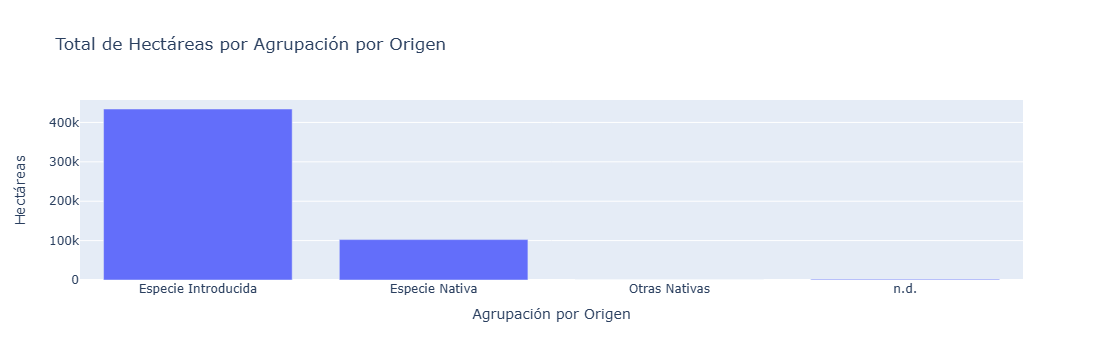

In [12]:
# Total de Hectáreas por "Agrupacion por Origen"
hectareas_origen = df.groupby('Agrupacion por Origen')['Hectareas (Ha)'].sum().reset_index()
fig = px.bar(hectareas_origen, x='Agrupacion por Origen', y='Hectareas (Ha)', title='Total de Hectáreas por Agrupación por Origen')
fig.update_layout(xaxis_title='Agrupación por Origen', yaxis_title='Hectáreas')
fig.show()

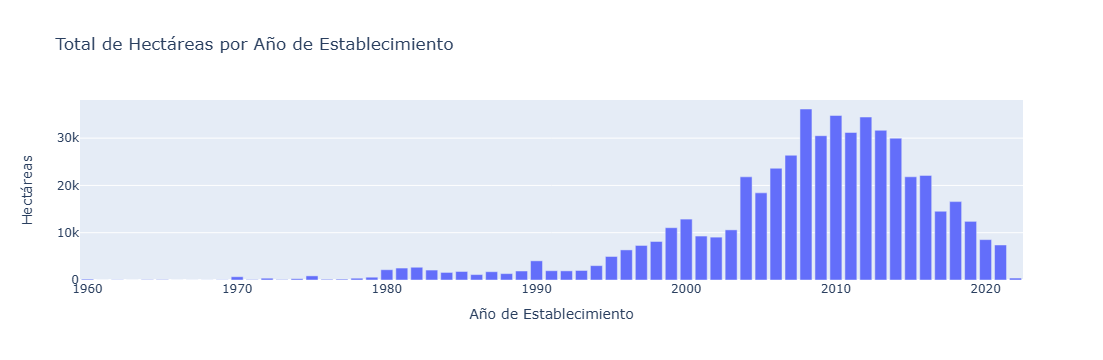

In [13]:
# Total de Hectáreas por Año de Establecimiento
hectareas_por_anio = df.groupby('Año de Establecimiento')['Hectareas (Ha)'].sum().reset_index()
fig = px.bar(hectareas_por_anio, x='Año de Establecimiento', y='Hectareas (Ha)', title='Total de Hectáreas por Año de Establecimiento')
fig.update_layout(xaxis_title='Año de Establecimiento', yaxis_title='Hectáreas')
fig.show()

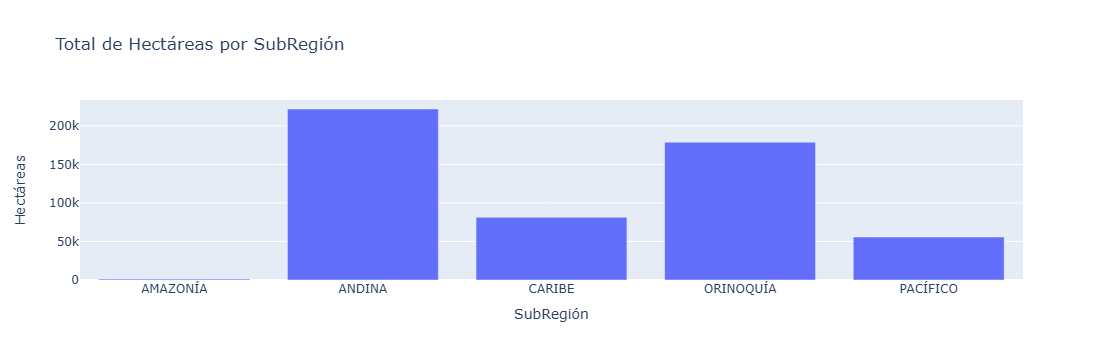

In [14]:
# Total de Hectáreas por SubRegión
hectareas_por_subregion = df.groupby('SubRegión')['Hectareas (Ha)'].sum().reset_index()
fig = px.bar(hectareas_por_subregion, x='SubRegión', y='Hectareas (Ha)', title='Total de Hectáreas por SubRegión')
fig.update_layout(xaxis_title='SubRegión', yaxis_title='Hectáreas')
fig.show()

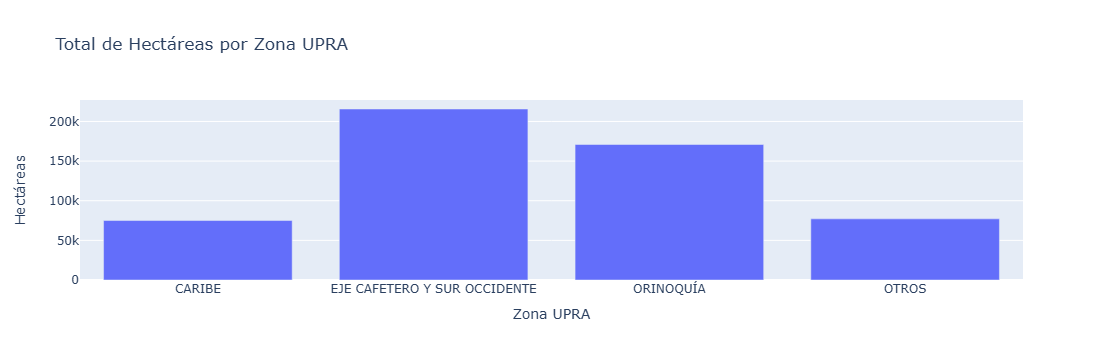

In [15]:
# Total de Hectáreas por Zona UPRA
hectareas_por_zona_upra = df.groupby('Zona UPRA')['Hectareas (Ha)'].sum().reset_index()
fig = px.bar(hectareas_por_zona_upra, x='Zona UPRA', y='Hectareas (Ha)', title='Total de Hectáreas por Zona UPRA')
fig.update_layout(xaxis_title='Zona UPRA', yaxis_title='Hectáreas')
fig.show()